# Task description

The file geo_localization.csv contains random geolocations (latitude and longtitude) obtained using two different services, with one taken as the base value (certainly correct) and the other as the prediction result (may be incorrect). The task is to determine and then visualize the prediction error.

Tasks:
+ code implementing the task
+ an .xlsx file containing the original data (without the index) with an additional error column containing the prediction error for each row
+ graphs/charts visualizing the prediction error

In [2]:
# Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = os.path.join(os.getcwd(),"data/geo_localization.csv")
df = pd.read_csv(file_path, header=0)

df = df.iloc[:, 1:]

In [4]:
df.head()

,base_lat,base_lon,predicted_lat,predicted_lon
0,52.725344,15.242907,52.725344,15.242905
1,52.238421,20.985096,52.238355,20.985066
2,51.064712,17.006516,51.064600,17.006631
3,50.210517,18.995660,50.210555,18.995702
4,51.052315,17.056584,51.052356,17.056607


## Concepts

I will consider two examples of error between two points. One in the two-dimensional space and second one in the real world using the Earth's radius.

In [5]:
#Variables
base_lat = df['base_lat']
base_lon = df['base_lon']
pred_lat = df['predicted_lat']
pred_lon = df['predicted_lon']

### Euclidean distancer

In [6]:
def euclidean_distance(base_lat, base_lon, pred_lat, pred_lon):
    return np.sqrt((pred_lat - base_lat)**2 + (pred_lon - base_lon)**2)

In [7]:
df['euclidean_distance'] = euclidean_distance(base_lat, base_lon, pred_lat, pred_lon)

### Haversine distance

In [8]:
def haversine_distance(base_lat, base_lon, pred_lat, pred_lon):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude to radians
    base_lat_rad = np.radians(base_lat)
    base_lon_rad = np.radians(base_lon)
    pred_lat_rad = np.radians(pred_lat)
    pred_lon_rad = np.radians(pred_lon)

    # Calculate differences between latitude and longitude
    diff_lat = pred_lat_rad - base_lat_rad
    diff_lon = pred_lon_rad - base_lon_rad
    # Calculate Haversine distance
    a = np.sin(diff_lat / 2)**2 + np.cos(base_lat_rad) * np.cos(pred_lat_rad) * np.sin(diff_lon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

In [9]:
df['haversine_distance'] = haversine_distance(base_lat, base_lon, pred_lat, pred_lon)

In [10]:
# displaying df head
df.head()

,base_lat,base_lon,predicted_lat,predicted_lon,euclidean_distance,haversine_distance
0,52.725344,15.242907,52.725344,15.242905,0.000002,0.000108
1,52.238421,20.985096,52.238355,20.985066,0.000073,0.007678
2,51.064712,17.006516,51.064600,17.006631,0.000161,0.014860
3,50.210517,18.995660,50.210555,18.995702,0.000057,0.005166
4,51.052315,17.056584,51.052356,17.056607,0.000047,0.004823


In [11]:
# droping NA columns since we don't have error for them
df.replace("", np.nan, inplace=True)

df = df.dropna()

In [12]:
len(df)

1482

### Saving dataframe as xlsx

In [13]:
save_path = "data/geo_localization.xlsx"

df.to_excel(save_path, index=False)

## Plots

### Histograms

Quick plot just for overview.

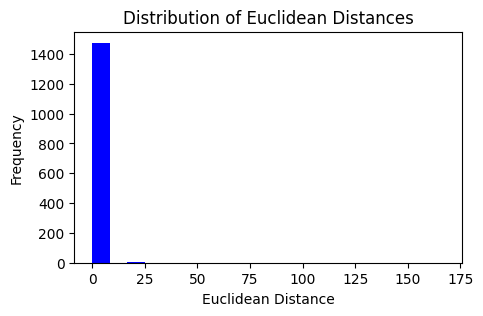

In [49]:
# Histogram of euclidean distances
plt.figure(figsize=(5, 3))
plt.hist(df['euclidean_distance'], bins=20, color='blue')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Euclidean Distances')
plt.show()


Plot above is not readable. Trying to set y-axis scale to logarithmic and some cosmetics.

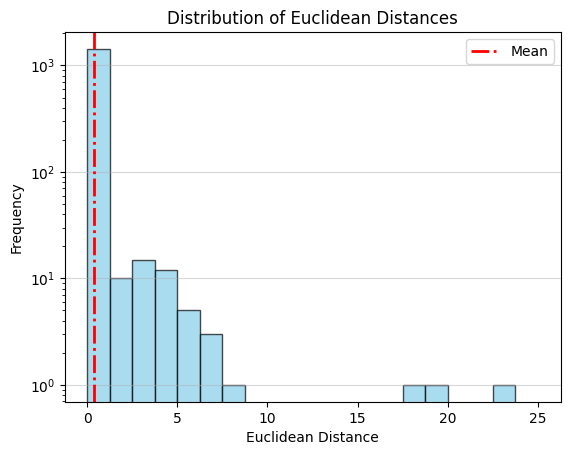

In [46]:
# Calculate the mean euclidean distance
ed_mean_distance = df['euclidean_distance'].mean()

plt.hist(df['euclidean_distance'], bins=20, color='skyblue', edgecolor='black', range=(0, 25), alpha=0.7)
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Euclidean Distances')

# Plot a vertical line at the mean distance
plt.axvline(ed_mean_distance, color='red', linestyle='dashdot', linewidth=2, label='Mean')

plt.legend()
plt.yscale('log')  # y-axis scale to logarithmic
plt.grid(axis='y', alpha=0.5)  # add gridlines to y-axis
plt.show()


Plot above do not show all values, we can try to improve it by calculating maximum distance and then dividing it into 21 bins.

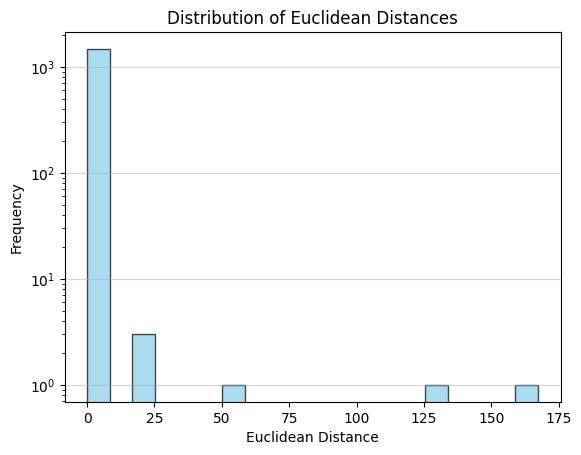

In [37]:
# Calculate the maximum distance value
ed_max_distance = df['euclidean_distance'].max()

# Define the bin edges
bin_edges = np.linspace(0, ed_max_distance, num=21)

# Plot the histogram with the adjusted bin range
plt.hist(df['euclidean_distance'], bins=bin_edges, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Euclidean Distances')
plt.yscale('log')
plt.grid(axis='y', alpha=0.5)
plt.show()


We will now proceed to plot a histogram that visualizes the haversine distance. However, it is worth nothing that plotting the haversine distances using the maximum distance and calculating the width of bins would lead to an overly cluttered and unreadable plot. Therefore, I decided to abstain from employing this approach.

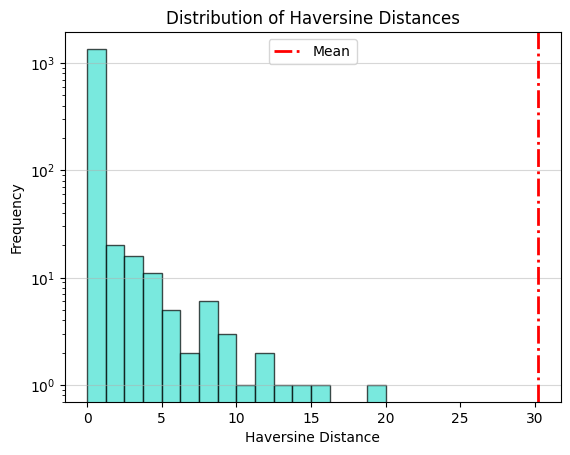

In [45]:
# Calculate the mean haversine distance
hd_mean_distance = df['haversine_distance'].mean()

plt.hist(df['haversine_distance'], bins=20, color='#40E0D0', edgecolor='black', range=(0, 25), alpha=0.7)
plt.xlabel('Haversine Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Haversine Distances')

# Plot a vertical line at the mean distance
plt.axvline(hd_mean_distance, color='red', linestyle='dashdot', linewidth=2, label='Mean')

plt.legend()
plt.yscale('log')  # y-axis scale to logarithmic
plt.grid(axis='y', alpha=0.5)  # add gridlines to y-axis
plt.show()


### Boxplots

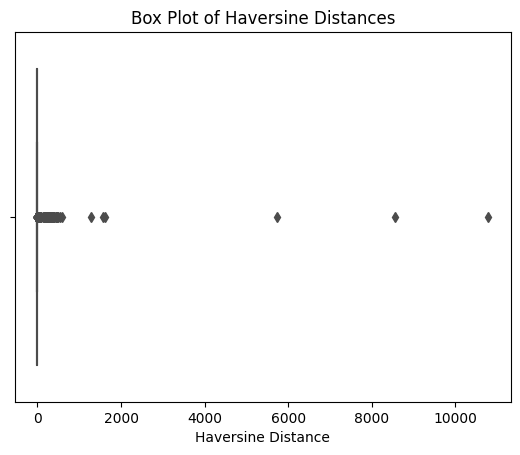

In [15]:
# Box plot of haversine distances
sns.boxplot(x=df['haversine_distance'], color='red')
plt.xlabel('Haversine Distance')
plt.title('Box Plot of Haversine Distances')
plt.show()


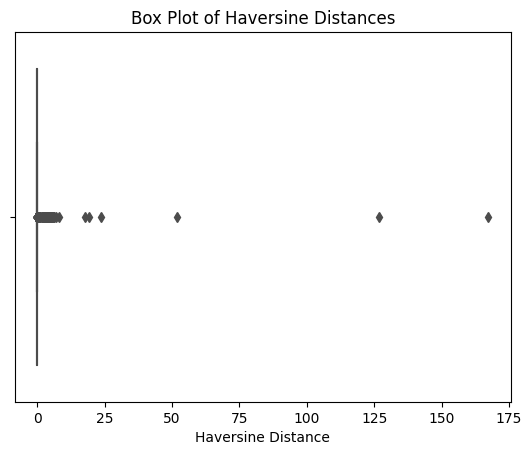

In [35]:
# Box plot of haversine distances
sns.boxplot(x=df['euclidean_distance'], color='red')
plt.xlabel('Haversine Distance')
plt.title('Box Plot of Haversine Distances')
plt.show()
